#### In this case study we are building a machine learning model which Predicts Hotel Booking Cancellation in 
#### Portugal Project. It will try to predict whether a booking will be cancelled or a 
#### booking will not be cancelled using machine learning based on historical data.
#### Another Goals of this project is to find out the characteristic of customers who cancelled 
#### and finding a pattern in cancelled booking by doing an exploratory data analysis 


In [2]:
# Importing all the required libraries for the project.


# Data analysis and wrangling
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Filter warning
import warnings
warnings.filterwarnings("ignore")

# Machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [3]:
# reading csv file data

hotel_data=pd.read_csv("C:\\Users\\admin\\Downloads\\hotel_bookings.csv")
hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
#Initial data exploration to find total number of columns and rows of our dataset and to find the data type of each column

hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel_data.shape

(119390, 32)

In [6]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Handling Missing Values

In [7]:
# Finding the percentage of all the null values in every column

hotel_data.isnull().sum()/len(hotel_data)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

##### **From above we can caonclude that 94% percent of data in column "company" is missing hence we can drop that column and other columns where there are  null values we can treat it by imputing values.

In [8]:
# Dropping column "company"

hotel_data=hotel_data.drop(['company'], axis=1)
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# Imputing null values for columns- "country","agent","children"

hotel_data["agent"]=hotel_data["agent"].fillna(hotel_data["agent"].median())

In [10]:
hotel_data["children"]=hotel_data["children"].fillna(hotel_data["children"].median())

In [11]:
# as percentage of missing values in "country" column is 0.4% so here I am using fillna approach to impute null values
hotel_data["country"]=hotel_data["country"].fillna(method='ffill')

In [12]:
hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

#### **From above we can see that our data is now free from all the missing values

# EDA

#### In this part, I would like to visualize some features and show statistical relationship with target variable. This analysis will help to get overall view and deep familiarity of the data, detect extreme values and identify obvious errors.


In [13]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Text(0, 0.5, 'Count')

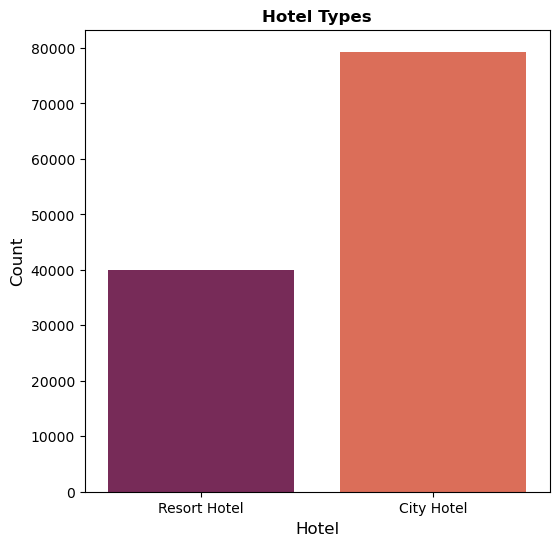

In [14]:
# Visualising no. of booking v/s type of hotel. According to data we have two types hotel
# and here we are going to visualise which type has most no.of bookings

plt.figure(figsize=(6,6))
sns.countplot(x='hotel', data = hotel_data, palette="rocket")
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

#### **From above graph we can see no of bookings count is more in city hotel than resort hotel

Text(0, 0.5, 'Count')

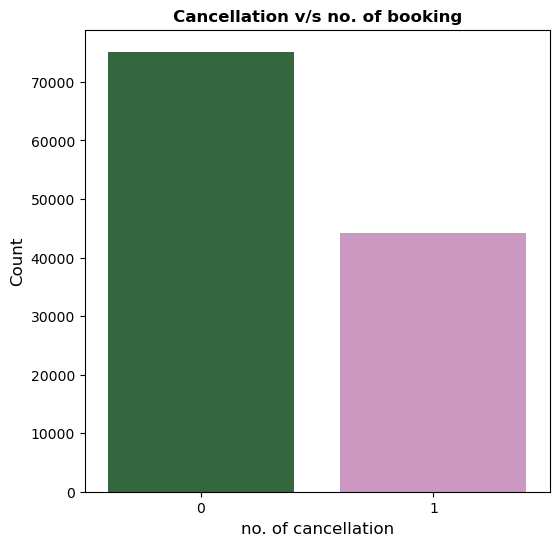

In [15]:
# In this graph we are going to visualise no. of cancellation v/s no. of bookings. 
# This graph will tell us how many booking are being cancelled out of total booking

plt.figure(figsize=(6,6))
sns.countplot(x='is_canceled', data = hotel_data, palette="cubehelix")
plt.title("Cancellation v/s no. of booking", weight='bold')
plt.xlabel('no. of cancellation', fontsize=12)
plt.ylabel('Count', fontsize=12)

#### **From the above we can conclude that approx 63% people did not cancel their booking and approx 37% did cancel hence data is slightly imbalaced but not highly imbalaced so there is not actual need of using oversampling or undersmapling technique.

Text(0, 0.5, 'Count')

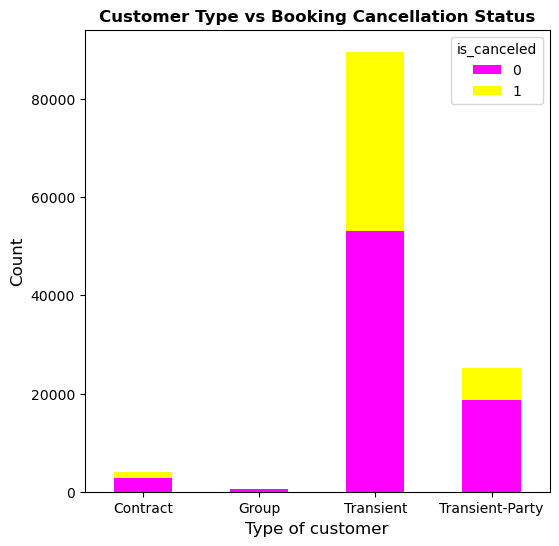

In [16]:
# We are going to visualise cancellation done by different type of customers out of total no. of bookings done by them.

group_customertype_cancel = hotel_data.groupby([ 'customer_type', 'is_canceled']).size().unstack()
group_customertype_cancel.plot(kind='bar', stacked=True, cmap='spring', figsize=(6,6))
plt.title('Customer Type vs Booking Cancellation Status', weight='bold')
plt.xlabel('Type of customer', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

#### **From above Graph we can conclude that most of the bookings and cancellation are done by Transient customers only.

Text(0, 0.5, 'Count')

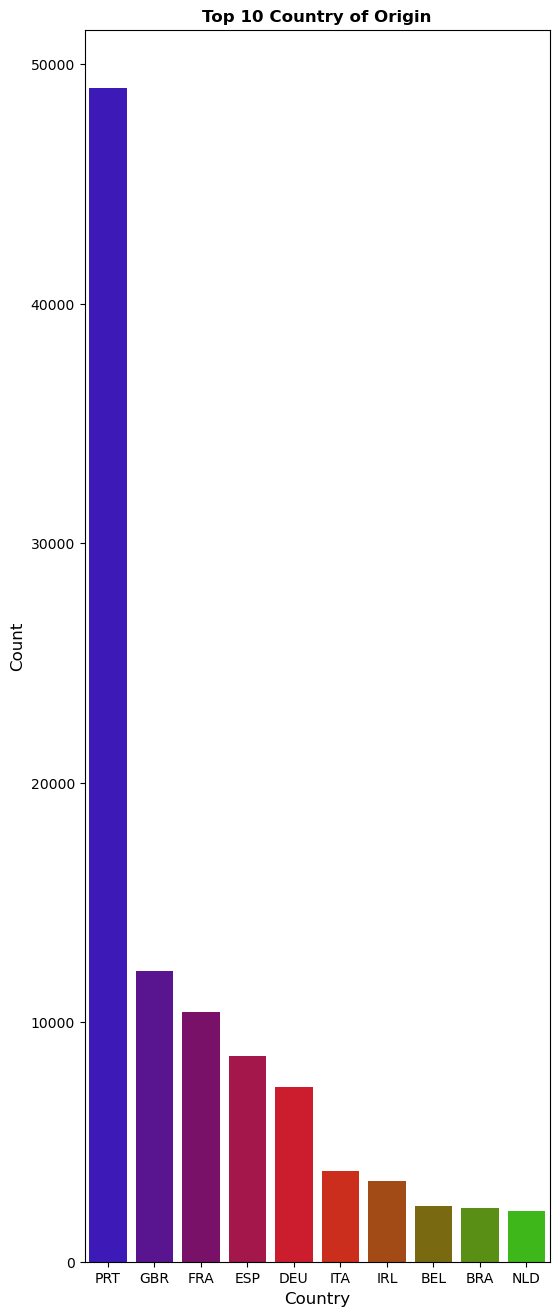

In [17]:
# Visualising no. of booking from top 10 countries.

plt.figure(figsize=(6,16))
sns.countplot(x='country', data=hotel_data, 
              order=pd.value_counts(hotel_data['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)


#### **From above we concluded that almost 40% of the booking are done from Portugal itself.

Text(0, 0.5, 'Count')

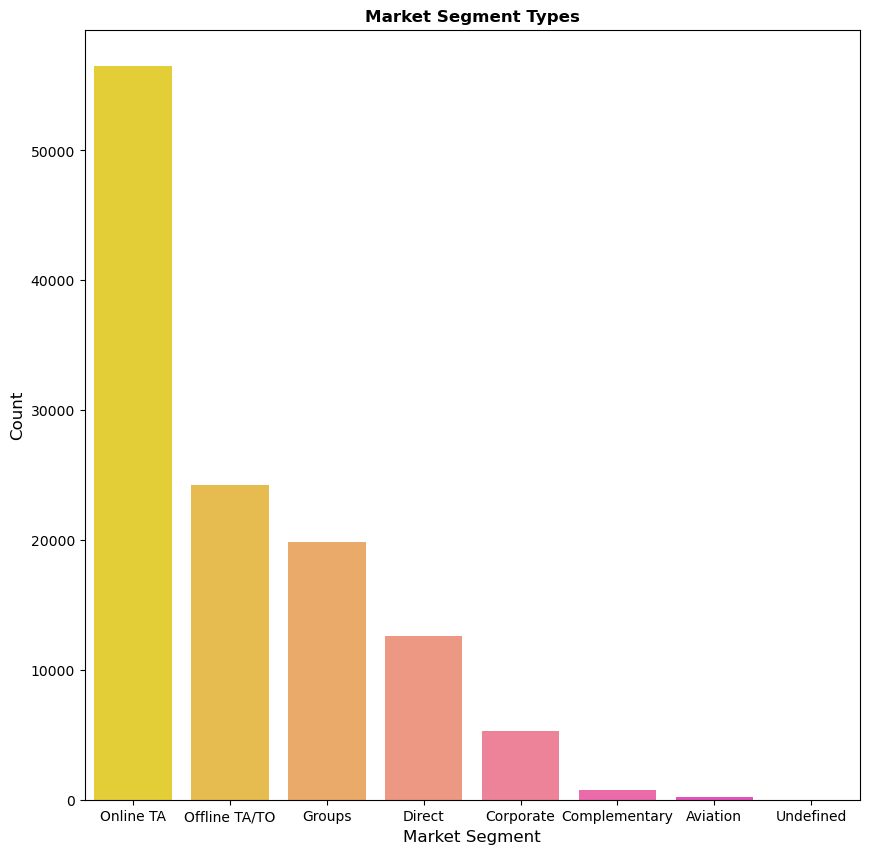

In [18]:
# "Market_segment" feature exploration

plt.figure(figsize=(10,10))
sns.countplot(x=hotel_data['market_segment'], palette='spring_r', 
              order=pd.value_counts(hotel_data['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

#### **From above we concluded that most of the bookings are done via Online Travel Agencies

Text(53.04047309027777, 0.5, 'ADR')

<Figure size 400x400 with 0 Axes>

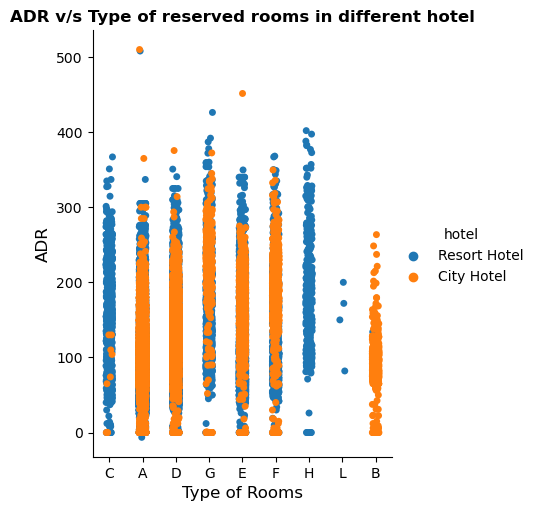

In [19]:
# Graph to show change in average daily rate of different types of rooms.

data = hotel_data[hotel_data['is_canceled'] == 0]

plt.figure(figsize=(4,4))
sns.catplot(data=data,x="reserved_room_type",y="adr",hue="hotel",height=5, aspect=.8)
plt.title('ADR v/s Type of reserved rooms in different hotel', weight='bold')
plt.xlabel('Type of Rooms', fontsize=12)
plt.ylabel('ADR', fontsize=12)

#### **From above graph we can conclude that Average daily rate varies with the type of room reserved by guest in different types of hotel. 

Text(38.6161892361111, 0.5, 'ADR')

<Figure size 1800x1000 with 0 Axes>

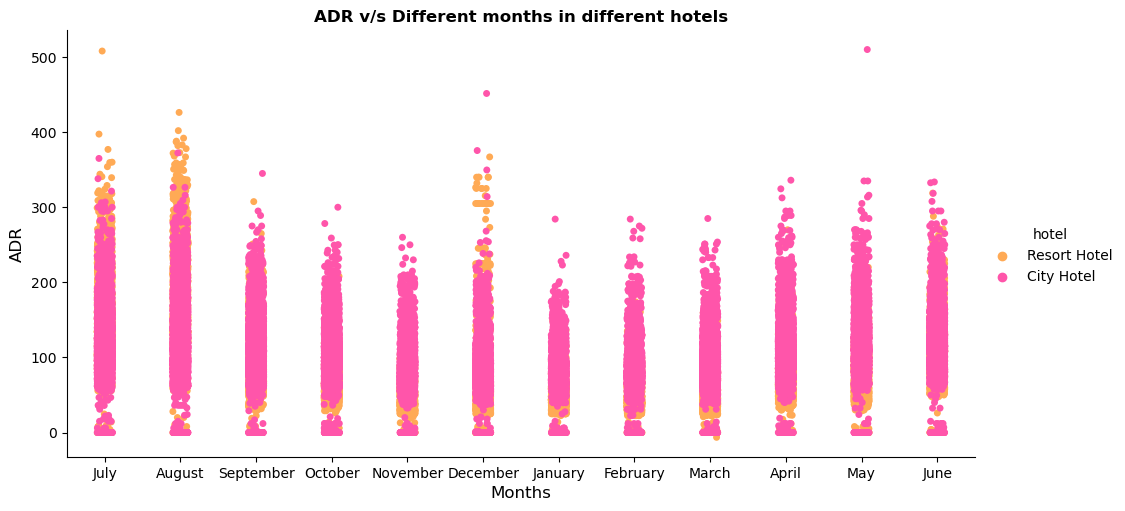

In [20]:
# We are going to visualise how ADR varies in different months in different hotels.

data = hotel_data[hotel_data['is_canceled'] == 0]

plt.figure(figsize=(18,10))
sns.catplot(data=data,x="arrival_date_month",y="adr",hue="hotel",height=5,aspect=2,palette='spring_r')
plt.title('ADR v/s Different months in different hotels', weight='bold')
plt.xlabel('Months', fontsize=12)
plt.ylabel('ADR', fontsize=12)

#### **From above graph we can conclude that most of the bookings are done in Spring and summer season of Portugal. ADR goes down from the month of September to February. Also most of the bookings are from Resort hotel.

Text(0, 0.5, 'ADR')

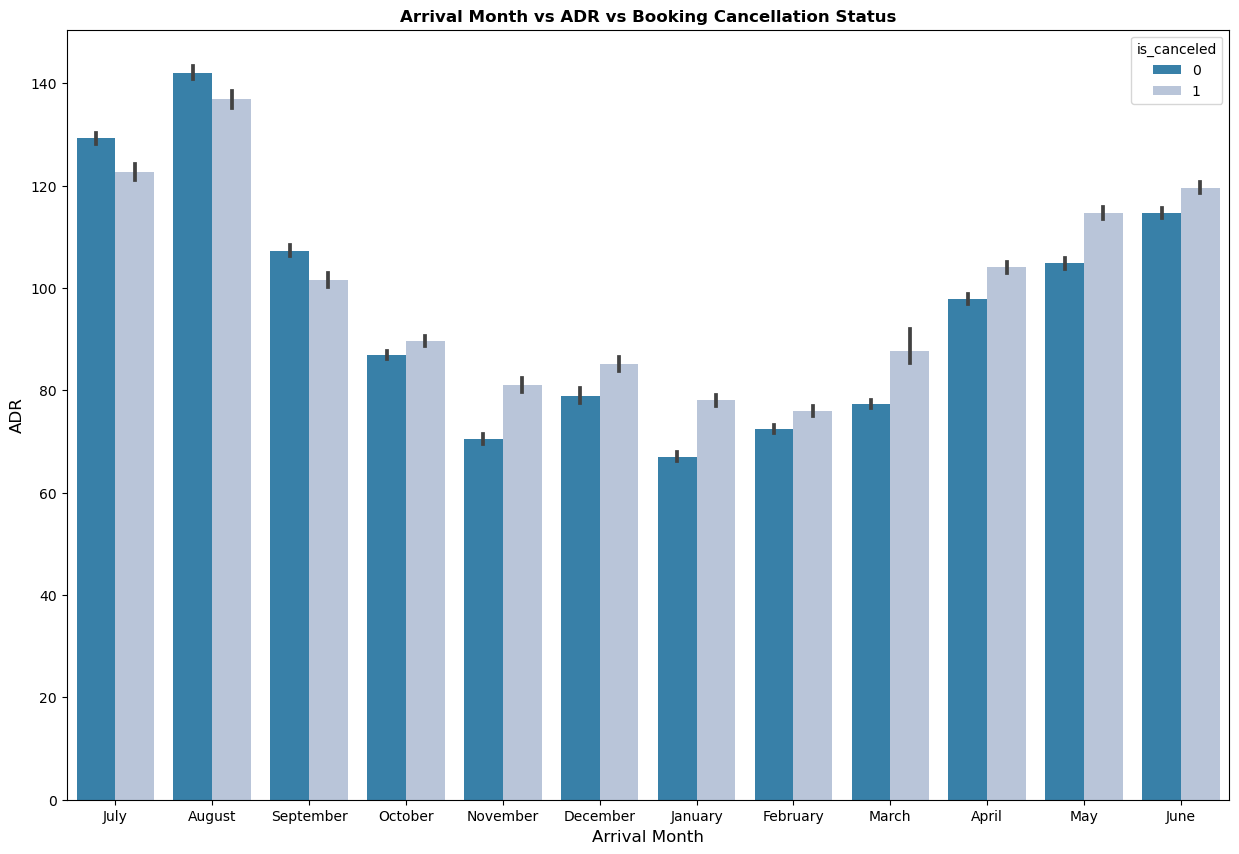

In [21]:
# We are now going to visualise no. of booking cancellation in different months because of ADR.

hotel_data['adr'] = hotel_data['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'PuBu_r', data=hotel_data)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

#### **Here we have concluded that as Average daily rate is high in spring and summer due to which most of the cancellation are done in same season due to high rates.

Text(0, 0.5, 'Count')

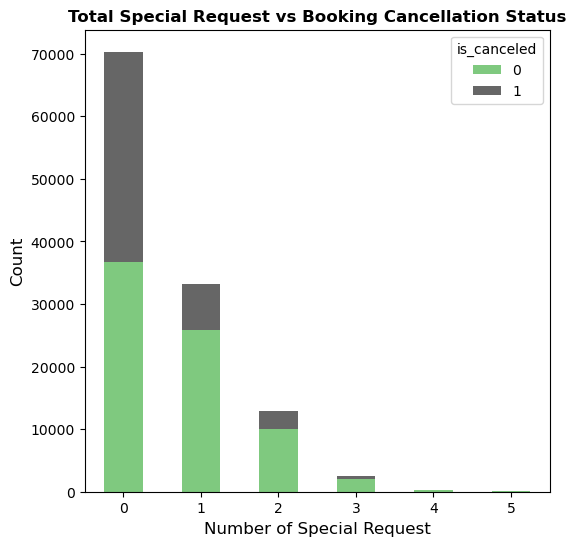

In [22]:
# We are now going to visualise the impact of special request on the no. of cancellation out of total bookings.

group_cancel_request = hotel_data.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack()
group_cancel_request.plot(kind='bar', stacked=True, cmap='Accent', figsize=(6,6))
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

#### **From above graph we can clearly see that almost 40% of the bookings are canceled when no special rquest is made by Guest.

In [23]:
# Now as we can see children and babies make no difference so we will combine these two features to make one

hotel_data['all_children'] = hotel_data['children'] + hotel_data['babies']

In [24]:
hotel_data=hotel_data.drop(["children","babies"],axis=1)

In [25]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,all_children
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0


In [26]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  meal                            119390 non-null  object 
 11  country                         119390 non-null  object 
 12  market_segment  

In [27]:
# Converting type of column "all_children"

hotel_data['all_children']= hotel_data['all_children'].astype(int)

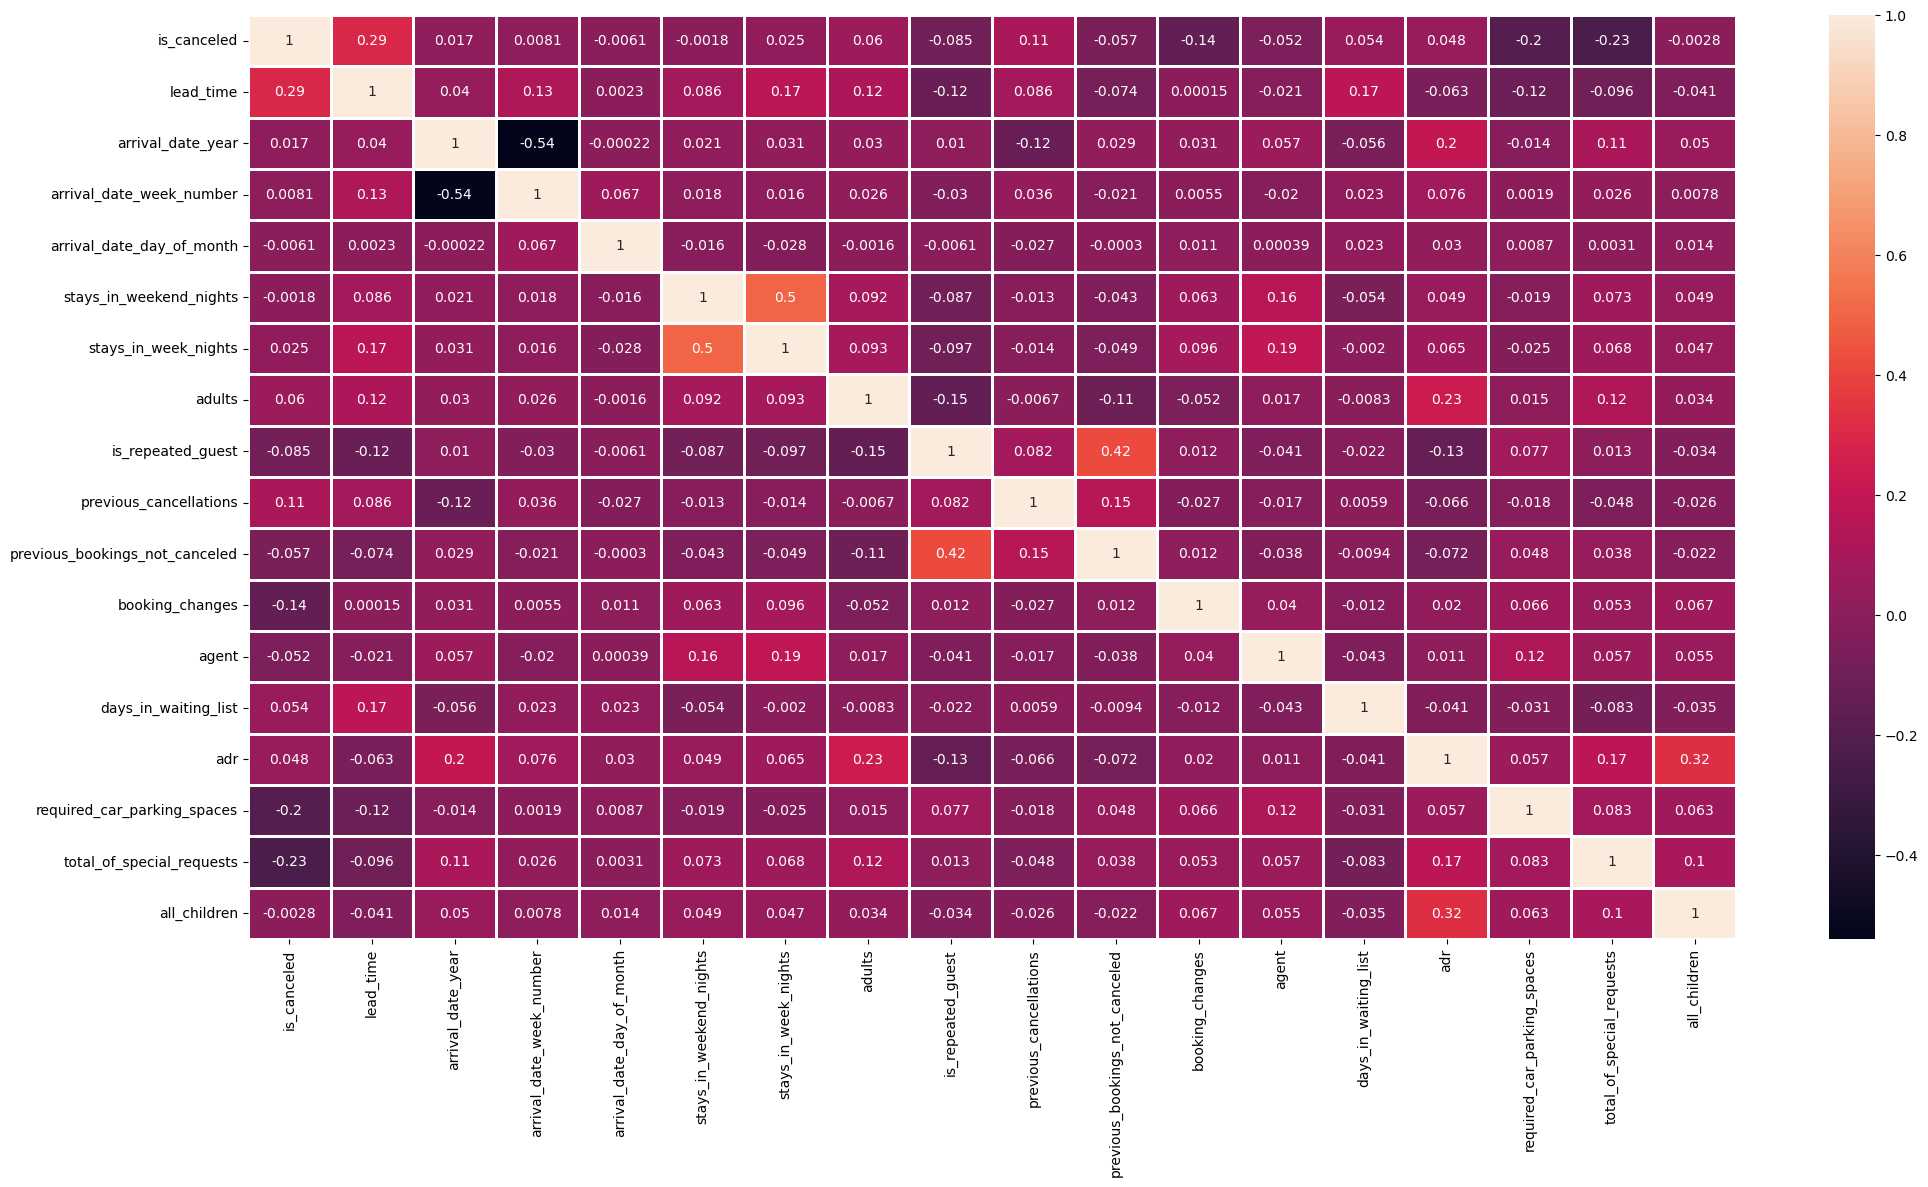

In [28]:
# Finding correlation of each column with each other

plt.figure(figsize = (24, 12))

corr = hotel_data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

### _From above heatmap we can conclude that feature "hotel" ,"reserved_room_type","previous__booking_not_canceled" and market_segment" are strongly correlated with "agent","assigned_room_type" ,"previous_cancellations"and "distribution channel". Hence we can drop "agent","assigned_room_type" ,"previous_cancellations" and "distribution channel" from data. Also we can see  ,"arrival_date_day_of_month" ,"days_in_waiting_list" and "arrival_date_week_number" are not much correlated with "is_canceled" hence not providing much insight about no. of cancellation. Therefore we will drop these two features as well_

### _Also reservation_status is a categorical feature that indicates the current status of a reservation. It can have values like 'Canceled', 'Check-Out', and 'No-Show'. This feature is directly related to the target variable is_canceled for the following reasons:

##### If the reservation_status is 'Canceled', it implies that is_canceled should be 1.
##### Similarly, if the reservation_status is 'Check-Out', it implies that the booking was not canceled, and hence is_canceled should be 0.
##### Therefore, knowing the reservation_status directly gives us the value of the target variable, leading to data leakage if it is used as a feature in the model. So, it is important to remove this feature to build a model that can actually predict cancellations. Therefore, reservation_status is considered as an irrelevant feature and should be omitted.

### _Since reservation_status_date includes date type data which also is directly related to target variable as change in this date can provide us direct info whether booking was canceled before that date or not. hence we will omit this too._

### _We can also drop arrival_date_year as it is only providing information for certain years hence can not be used for future predictions therefore it can be considered as irrelevant features._


In [29]:
hotel_data=hotel_data.drop(["agent","assigned_room_type","distribution_channel",
                            "arrival_date_week_number","reservation_status_date",
                            "previous_cancellations","arrival_date_day_of_month",
                            "days_in_waiting_list","reservation_status","arrival_date_year"],axis=1)

In [30]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,all_children
0,Resort Hotel,0,342,July,0,0,2,BB,PRT,Direct,0,0,C,3,No Deposit,Transient,0.0,0,0,0
1,Resort Hotel,0,737,July,0,0,2,BB,PRT,Direct,0,0,C,4,No Deposit,Transient,0.0,0,0,0
2,Resort Hotel,0,7,July,0,1,1,BB,GBR,Direct,0,0,A,0,No Deposit,Transient,75.0,0,0,0
3,Resort Hotel,0,13,July,0,1,1,BB,GBR,Corporate,0,0,A,0,No Deposit,Transient,75.0,0,0,0
4,Resort Hotel,0,14,July,0,2,2,BB,GBR,Online TA,0,0,A,0,No Deposit,Transient,98.0,0,1,0


In [31]:
hotel_data.shape

(119390, 20)

In [32]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   meal                            119390 non-null  object 
 8   country                         119390 non-null  object 
 9   market_segment                  119390 non-null  object 
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_bookings_not_canceled  119390 non-null  int64  
 12  reserved_room_ty

#### **From above we can now see that data is left with 1 float dtype column, 12 int dtype column and 8 object i.e string dtype columns



In [33]:
# listing the columns that are categorical in terms of their categories.

categorical_columns = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'is_repeated_guest',
    'reserved_room_type',
    'deposit_type',
    'agent',
    'customer_type']

# Converting them to string dtype i. object

for column in categorical_columns:
    if column in hotel_data.columns:
        hotel_data[column] = hotel_data[column].astype(str)

In [34]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   meal                            119390 non-null  object 
 8   country                         119390 non-null  object 
 9   market_segment                  119390 non-null  object 
 10  is_repeated_guest               119390 non-null  object 
 11  previous_bookings_not_canceled  119390 non-null  int64  
 12  reserved_room_ty

In [35]:
# Statisticals for categorical data
hotel_data.describe(include="object").T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,177,PRT,48992
market_segment,119390,8,Online TA,56477
is_repeated_guest,119390,2,0,115580
reserved_room_type,119390,10,A,85994
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


#### _Here we can see column country has 177 unique values which is quite large to handle hence for ease we can drop this feature as well._

In [36]:
hotel_data=hotel_data.drop(["country"], axis=1)

In [37]:
# Statistics for numerical data

hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.00,0.000,0.0,21.0
adr,119390.0,101.831122,50.535790,-6.38,69.29,94.575,126.0,5400.0
required_car_parking_spaces,119390.0,0.062518,0.245291,0.00,0.00,0.000,0.0,8.0
total_of_special_requests,119390.0,0.571363,0.792798,0.00,0.00,0.000,1.0,5.0


### **From above statistics we can see there is some noisy data in column adr,all_children and adults.

#### "adr"= there are negetive values in this column which is absurd as this column provides us information regarding average daily rate and that can't be negative.
#### "adults"= there is 0 value in adult column that means there is no adult and it can't be possible for a child to check in hotel without adult.
#### "all_children"= There is max value of 10 children in one column which is quite unusual hence considered as outlier and should be omitted.

# Handling Noisy Data

In [38]:
noisy_data = {
    'adr':      hotel_data[hotel_data['adr'] < 0],
    'adults':   hotel_data[hotel_data['adults'] == 0],
    'all_children': hotel_data[hotel_data['all_children'] == 10],}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1, 'adults': 403, 'all_children': 2}

#### ** Here we can see that there is one negative adr value therefore we will replace it with median, 386 rows with adult 0 so it is better we remove rows with 0 adults as values is not that big so removing rows won't impact our data that much and 2 columns with children 10 which is considered as oulier since it is unusuaaly large from other values of that column hence should be omitted..

In [39]:
# Replace negative adr with median of adr column
hotel_data.loc[hotel_data['adr'] < 0, 'adr'] = hotel_data['adr'].median()

In [40]:
# Deleting rows with 0 adults
hotel_data=hotel_data.loc[hotel_data["adults"]!=0]

In [41]:
# Deleting rows with 10 children
hotel_data=hotel_data.loc[hotel_data["all_children"]!=10]

In [42]:
# Resetting the index
hotel_data.reset_index(drop=True, inplace=True)

In [43]:
#Checking if noisy data is treated or not.
noisy_data_handled = {
    'adr': hotel_data[hotel_data['adr'] < 0],
    'adults': hotel_data[hotel_data['adults'] == 0],
    'all_children': hotel_data[hotel_data['all_children'] == 10]}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'adr': 0, 'adults': 0, 'all_children': 0}

# Encoding

In [44]:
# One hot encoding- it is used for data which is not in order.
# Label encoding- it is used for data which is in order.

### One Hot Encoding

The following features are nominal variables and should be one-hot encoded:

`hotel`

`meal`

`market_segment`

`reserved_room_type`

`deposit_type`

`customer_type`

In [45]:
one_hot_cols = ['hotel', 'meal', 'market_segment', 'reserved_room_type', 'deposit_type', 'customer_type',"is_repeated_guest"]
hotel_data = pd.get_dummies(hotel_data, columns=one_hot_cols, drop_first=True)


# Label Encoding

The following feature is an ordinal variable and should be label encoded:

`arrival_date_month`


In [46]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']
hotel_data["arrival_date_month"]= hotel_data["arrival_date_month"].apply(lambda i:months.index(i)+1)

In [47]:
hotel_data.head()

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,is_repeated_guest_1
0,0,342,7,0,0,2,0,3,0.0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,737,7,0,0,2,0,4,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,7,7,0,1,1,0,0,75.0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,13,7,0,1,1,0,0,75.0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,14,7,0,2,2,0,0,98.0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118985.0,0.370753,0.483008,0.0,0.0,0.0,1.0,1.0
lead_time,118985.0,104.071513,106.891402,0.0,18.0,69.0,160.0,737.0
arrival_date_month,118985.0,6.552364,3.089340,1.0,4.0,7.0,9.0,12.0
stays_in_weekend_nights,118985.0,0.926932,0.995235,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,118985.0,2.498987,1.897654,0.0,1.0,2.0,3.0,50.0
adults,118985.0,1.862689,0.570064,1.0,2.0,2.0,2.0,55.0
previous_bookings_not_canceled,118985.0,0.137345,1.499539,0.0,0.0,0.0,0.0,72.0
booking_changes,118985.0,0.218507,0.638068,0.0,0.0,0.0,0.0,18.0
adr,118985.0,102.008810,50.448165,0.0,69.5,95.0,126.0,5400.0
required_car_parking_spaces,118985.0,0.062655,0.245546,0.0,0.0,0.0,0.0,8.0


In [49]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  int64  
 3   stays_in_weekend_nights         118985 non-null  int64  
 4   stays_in_week_nights            118985 non-null  int64  
 5   adults                          118985 non-null  int64  
 6   previous_bookings_not_canceled  118985 non-null  int64  
 7   booking_changes                 118985 non-null  int64  
 8   adr                             118985 non-null  float64
 9   required_car_parking_spaces     118985 non-null  int64  
 10  total_of_special_requests       118985 non-null  int64  
 11  all_children                    118985 non-null  int32  
 12  hotel_Resort Hot

# Model Training and Selection

### Train/Test Split

In [50]:
X= hotel_data.drop(["is_canceled"],axis=1)
X.shape

(118985, 37)

In [51]:
y= hotel_data["is_canceled"]
y.shape

(118985,)

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,stratify=y)

In [53]:
X_train.shape

(95188, 37)

In [54]:
y_train.shape

(95188,)

# Decision Tree Classifier

In [55]:
dt_base = DecisionTreeClassifier(random_state=0)

### Hyperparameter Tuning

In [56]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest F1-score for class 1 (canceled bookings) is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
# Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

# Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

# Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

# Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
# Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [57]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [13, 14, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

##### Since the data is slightly imbalanced and we want to optimize for class 1, we have included the class_weight parameter in our grid. In the grid above, the weight for class 0 is always 1, while the weight for class 1 varies from 1 to 5. This will help the model to focus more on class 1.

In [58]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [59]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Dt Model Evaluation

In [60]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [61]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
     # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 
    


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     59897
           1       0.75      0.83      0.79     35291

    accuracy                           0.84     95188
   macro avg       0.82      0.84      0.83     95188
weighted avg       0.84      0.84      0.84     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.81      0.84     14974
           1       0.71      0.78      0.75      8823

    accuracy                           0.80     23797
   macro avg       0.79      0.80      0.79     23797
weighted avg       0.81      0.80      0.80     23797



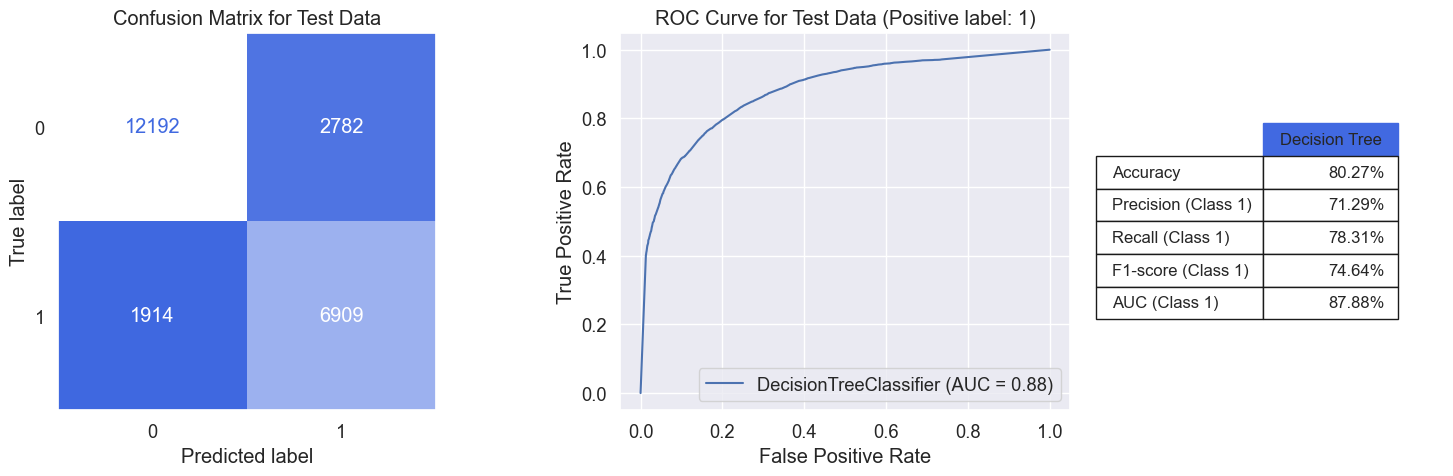

In [62]:
model_evaluation(best_dt, X_train, X_test, y_train, y_test, 'Decision Tree')

In [63]:
dt_result = metrics_calculator(best_dt, X_test, y_test, 'Decision Tree')
dt_result

,Decision Tree
Accuracy,80.27%
Precision (Class 1),71.29%
Recall (Class 1),78.31%
F1-score (Class 1),74.64%
AUC (Class 1),87.88%


# Random Forest Classifier

In [64]:
rf_base = RandomForestClassifier(random_state=0, n_jobs=-1)

In [65]:
 param_grid_rf = {
     'n_estimators': [100, 150],
     'criterion': ['entropy'],
     'max_depth': [16, 18],
     'min_samples_split': [2, 3, 4],
     'min_samples_leaf': [1, 2, 3],
     'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
 }

In [66]:
# # Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### RF Model Evaluation

In [ ]:
# model_evaluation(best_rf, X_train, X_test, y_train, y_test, 'Random Forest')

In [67]:
rf_result = metrics_calculator(best_rf, X_test, y_test, 'Random Forest')
rf_result

,Random Forest
Accuracy,83.17%
Precision (Class 1),76.73%
Recall (Class 1),78.4%
F1-score (Class 1),77.55%
AUC (Class 1),90.95%


# Conclusion

From above we can see that Random Forest gives better accuracy than Decision Tree